# Analisando dados de produção hospitalar

In [832]:

import pandas as pd
import numpy as np


In [833]:
dados=pd.read_csv("/content/sih_cnv_qiuf161203177_83_61_250.csv",encoding="ISO-8859-1",
            skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")


<ipython-input-833-a40514271e50>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados=pd.read_csv("/content/sih_cnv_qiuf161203177_83_61_250.csv",encoding="ISO-8859-1",


In [834]:
dados.head()



,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11273846.83,12443977.87,13054654.77,11275964.10,12082214.04,11556924.60,9659022.77,12009613.24,9350696.06,1405327626.00
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,4308072.76,-,592086480.70
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,22198453.04,24809424.63,25005360.86,17522338.72,19666174.84,18699831.38,14319685.45,15620232.73,19370859.68,2633903286.60
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,3795465.55,2077360.03,2164371.02,2040590.11,454137573.42
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,45951158.29,54114992.86,50141584.65,51268388.79,50803326.33,55706352.93,55456529.39,46438801.45,44348336.33,6371438493.34


In [835]:
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,113809028.30,116985178.63,120027121.08,116546657.80,122327620.35,114961095.80,114592706.42,122175213.25,110157952.68,16861947552.87
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,26354221.47,26569066.08,27768462.56,28200723.03,26868302.10,27575792.21,26937561.34,27844589.98,23634078.86,3247362278.45
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,24728541.29,24130933.81,22608901.38,23379073.20,22623239.98,22789970.76,20845003.68,22488502.82,12019459.58,3002684342.10
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,44676392.00,53628779.29,51028274.80,49931584.30,50616320.43,48011008.65,51111292.44,50565026.55,43744755.34,6730663508.26
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,28258576.00,29034177.33,30961244.28,31610313.47,29140330.80,30810835.09,29465293.81,31878001.55,29178538.74,3572205548.70


In [836]:
columns_with_dash = dados.columns[dados.apply(lambda col: col.astype(str).str.contains('-').any())]

# Substitua os valores "-" por NaN
dados[columns_with_dash] = dados[columns_with_dash].replace('-', np.nan)

# Converta as colunas para float64
dados[columns_with_dash] = dados[columns_with_dash].astype(float)

# Verifique novamente os tipos de dados das colunas
print(dados.dtypes)
# A opção 'errors='coerce'' é usada para converter qualquer valor que não possa ser convertido em número para NaN (Not a Number)


Unidade da Federação     object
2008/Jan                float64
2008/Fev                float64
2008/Mar                float64
2008/Abr                float64
                         ...   
2023/Nov                float64
2023/Dez                float64
2024/Jan                float64
2024/Fev                float64
Total                   float64
Length: 196, dtype: object


In [837]:
dados.info()
print(dados['Unidade da Federação'].head())  # Amostras da coluna "Unidade da Federação"



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 196 entries, Unidade da Federação to Total
dtypes: float64(195), object(1)
memory usage: 41.5+ KB
0    11 Rondônia
1        12 Acre
2    13 Amazonas
3     14 Roraima
4        15 Pará
Name: Unidade da Federação, dtype: object


In [838]:
pd.options.display.float_format="{:.2f}".format

In [839]:
columns_to_exclude = ['Unidade da Federação']

# Calculando a média (mean) apenas das colunas numéricas que não estão na lista 'columns_to_exclude'
mean_without_excluded_columns = dados.drop(columns=columns_to_exclude).mean()
dados.columns

colunas_usaveis = mean_without_excluded_columns.index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis[:5]


['Unidade da Federação', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr']

In [840]:
dados["2023/Dez"].mean()
dados["Unidade da Federação"]

0                11 Rondônia
1                    12 Acre
2                13 Amazonas
3                 14 Roraima
4                    15 Pará
5                   16 Amapá
6               17 Tocantins
7                21 Maranhão
8                   22 Piauí
9                   23 Ceará
10    24 Rio Grande do Norte
11                25 Paraíba
12             26 Pernambuco
13                27 Alagoas
14                28 Sergipe
15                  29 Bahia
16           31 Minas Gerais
17         32 Espírito Santo
18         33 Rio de Janeiro
19              35 São Paulo
20                 41 Paraná
21         42 Santa Catarina
22      43 Rio Grande do Sul
23     50 Mato Grosso do Sul
24            51 Mato Grosso
25                  52 Goiás
26       53 Distrito Federal
Name: Unidade da Federação, dtype: object

<Axes: xlabel='Unidade da Federação'>

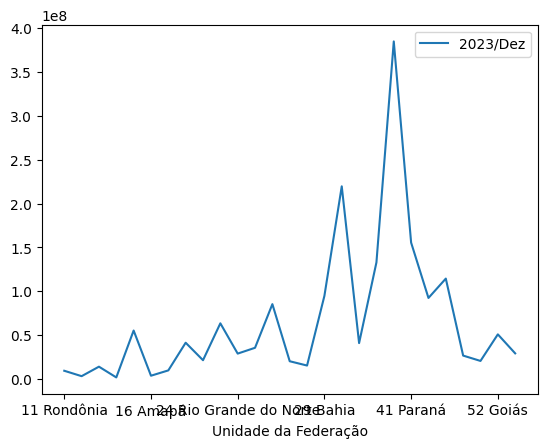

In [841]:
dados.plot(x="Unidade da Federação",y="2023/Dez")


<Axes: xlabel='Unidade da Federação'>

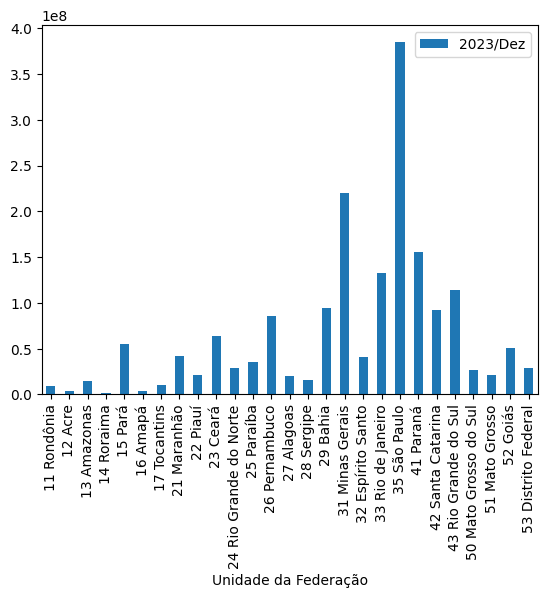

In [842]:
dados.plot(x="Unidade da Federação",y="2023/Dez", kind="bar")

<Axes: xlabel='Unidade da Federação'>

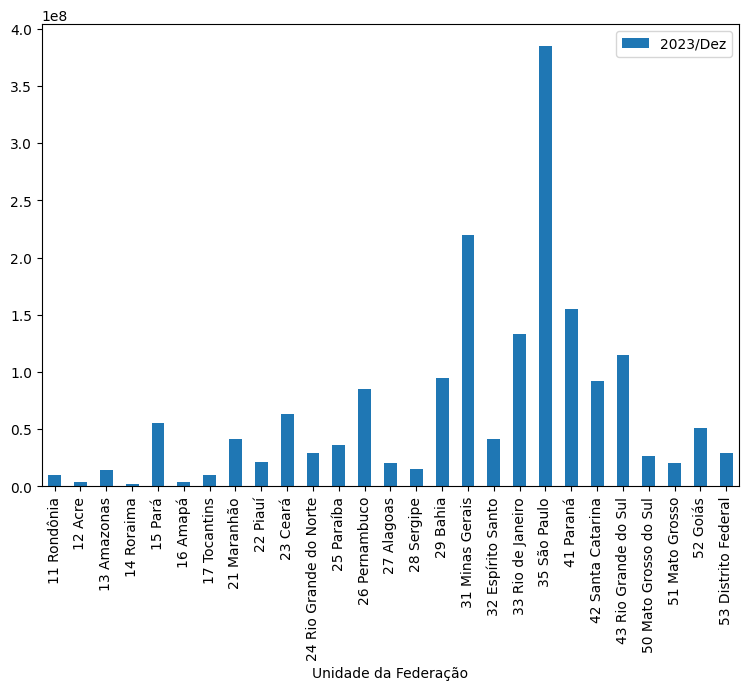

In [843]:
dados.plot(x="Unidade da Federação",y="2023/Dez", kind="bar",figsize=(9,6))

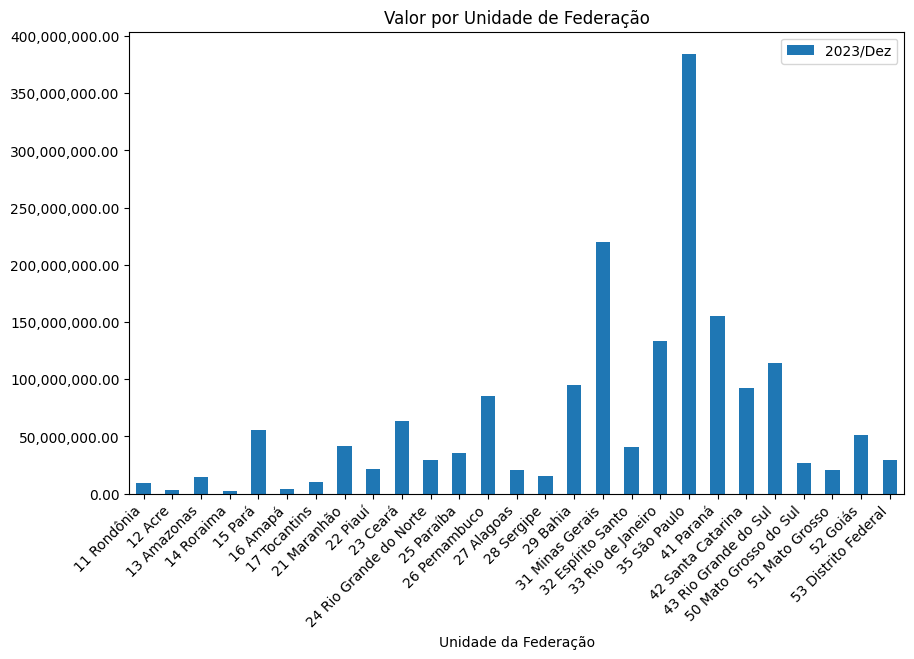

In [844]:
import matplotlib.ticker as ticker
axis=dados.plot(x="Unidade da Federação",y="2023/Dez", kind="bar",figsize=(10,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
import matplotlib.pyplot as plt
plt.xticks(rotation=45, ha='right')


plt.title("Valor por Unidade de Federação")
plt.show()


In [845]:
#Colocando duas colunas
dados[["2021/Set","2021/Out"]].head()


# Substitua os valores "-" por NaN
dados[columns_with_dash] = dados[columns_with_dash].replace('-', np.nan)

# Converta as colunas para float64
dados[columns_with_dash] = dados[columns_with_dash].astype(float)

# Verifique novamente os tipos de dados das colunas
dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11273846.83,12443977.87,13054654.77,11275964.10,12082214.04,11556924.60,9659022.77,12009613.24,9350696.06,1405327626.00
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,4308072.76,NaN,592086480.70
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,22198453.04,24809424.63,25005360.86,17522338.72,19666174.84,18699831.38,14319685.45,15620232.73,19370859.68,2633903286.60
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,3795465.55,2077360.03,2164371.02,2040590.11,454137573.42
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,45951158.29,54114992.86,50141584.65,51268388.79,50803326.33,55706352.93,55456529.39,46438801.45,44348336.33,6371438493.34
5,16 Amapá,1120973.34,1268740.33,974651.24,1141137.32,866346.18,1440978.95,1426659.48,1475551.38,1651341.43,...,3497928.26,5812495.72,3503666.51,3218091.37,3361503.59,3159644.32,4021077.83,3961035.17,4339815.79,438397478.82
6,17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,...,9213748.90,8917570.89,9627055.69,9418896.52,9147983.05,8620368.58,10074761.74,9153216.24,9283592.85,1382210526.05
7,21 Maranhão,10723506.39,13559679.41,13985142.36,14809416.46,14505727.38,14908091.32,15784899.40,15195312.89,14951277.75,...,38585635.17,41505279.92,39522657.84,41622528.35,40056471.73,43623519.32,41588338.56,40332199.51,36315110.81,5285897161.35
8,22 Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.40,10899198.97,...,22927380.71,23012661.22,22561338.38,24604607.40,22561682.28,23220140.98,21679394.17,20742978.54,20059583.85,3075817947.72
9,23 Ceará,15539821.90,25735101.55,28724625.75,30676457.06,30604453.47,31272395.18,30925391.36,27851438.72,30362719.90,...,63421142.25,64067527.80,63978316.10,64111417.85,66978607.89,66991264.39,63671118.08,65322639.89,59435623.86,8917908607.72


In [846]:
columns_to_exclude = ['Unidade da Federação']

# Calculando a média (mean) apenas das colunas numéricas que não estão na lista 'columns_to_exclude'
mean_without_excluded_columns = dados.drop(columns=columns_to_exclude).mean()
dados.columns
print(mean_without_excluded_columns)


2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2023/Nov     65841520.74
2023/Dez     65817796.74
2024/Jan     66123989.36
2024/Fev     65212605.69
Total      8643565072.02
Length: 195, dtype: float64


In [847]:
colunas_usaveis = mean_without_excluded_columns.index.tolist()


In [848]:
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis[:5]

['Unidade da Federação', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr']

In [849]:
dados_usaveis = dados[colunas_usaveis]
dados_usaveis.head()


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11273846.83,12443977.87,13054654.77,11275964.10,12082214.04,11556924.60,9659022.77,12009613.24,9350696.06,1405327626.00
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,4308072.76,NaN,592086480.70
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,22198453.04,24809424.63,25005360.86,17522338.72,19666174.84,18699831.38,14319685.45,15620232.73,19370859.68,2633903286.60
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,3795465.55,2077360.03,2164371.02,2040590.11,454137573.42
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,45951158.29,54114992.86,50141584.65,51268388.79,50803326.33,55706352.93,55456529.39,46438801.45,44348336.33,6371438493.34


In [850]:
dados_usaveis = dados_usaveis.set_index("Unidade da Federação")
dados_usaveis.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,11273846.83,12443977.87,13054654.77,11275964.10,12082214.04,11556924.60,9659022.77,12009613.24,9350696.06,1405327626.00
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,4308072.76,NaN,592086480.70
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,22198453.04,24809424.63,25005360.86,17522338.72,19666174.84,18699831.38,14319685.45,15620232.73,19370859.68,2633903286.60
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,3795465.55,2077360.03,2164371.02,2040590.11,454137573.42
15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,45951158.29,54114992.86,50141584.65,51268388.79,50803326.33,55706352.93,55456529.39,46438801.45,44348336.33,6371438493.34


In [851]:
dados_usaveis["2019/Ago"].head()


Unidade da Federação
11 Rondônia    9170787.53
12 Acre        3204998.88
13 Amazonas   15787896.78
14 Roraima     3788154.80
15 Pará       31179893.86
Name: 2019/Ago, dtype: float64

In [852]:
dados_usaveis.loc["12 Acre"]


2008/Jan      902416.00
2008/Fev     1497206.26
2008/Mar     1794028.48
2008/Abr     1730469.42
2008/Mai     1819443.92
               ...     
2023/Nov     5712687.05
2023/Dez     3503827.09
2024/Jan     4308072.76
2024/Fev            NaN
Total      592086480.70
Name: 12 Acre, Length: 195, dtype: float64

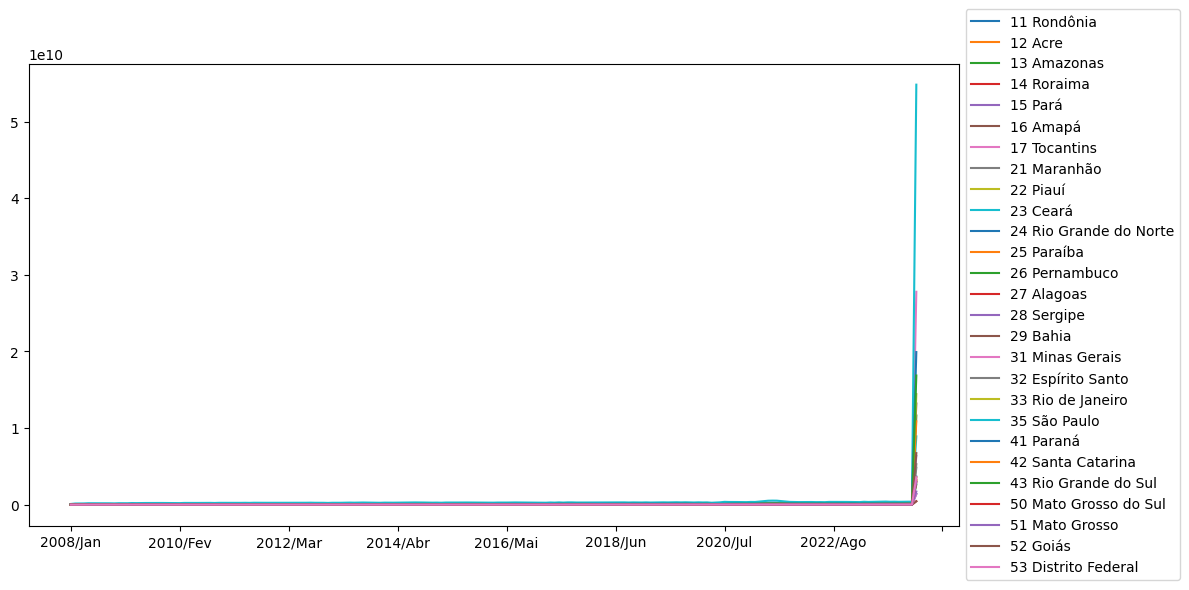

In [853]:
ax=dados_usaveis.T.plot(figsize=(12,6))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar o gráfico
plt.show()

In [854]:
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{y:,.2f}"))

In [855]:
dados_usaveis.T.head()
dados_usaveis = dados_usaveis.drop("Total", axis=1)
dados_usaveis.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,13767058.64,11273846.83,12443977.87,13054654.77,11275964.10,12082214.04,11556924.60,9659022.77,12009613.24,9350696.06
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,4845006.75,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,4308072.76,NaN
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,21710028.09,22198453.04,24809424.63,25005360.86,17522338.72,19666174.84,18699831.38,14319685.45,15620232.73,19370859.68
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,4435042.77,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,3795465.55,2077360.03,2164371.02,2040590.11
15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,46925899.02,45951158.29,54114992.86,50141584.65,51268388.79,50803326.33,55706352.93,55456529.39,46438801.45,44348336.33


In [856]:
dados_usaveis.T.head()


Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008/Jan,1388528.39,902416.00,4735529.42,657889.53,18864744.11,1120973.34,3441592.69,10723506.39,7985142.43,15539821.90,...,5456723.98,23025258.52,91678473.48,38266347.46,16504913.45,30931325.46,5377392.11,4795299.01,15310637.29,4745919.19
2008/Fev,2931283.42,1497206.26,7118990.57,777939.31,19553758.20,1268740.33,4985688.85,13559679.41,10079928.25,25735101.55,...,9102212.86,28394310.93,148677526.82,55384670.52,25651429.11,57363420.01,7002472.61,8684882.23,22258668.68,7632480.67
2008/Mar,1541682.52,1794028.48,8196635.49,718688.03,21937342.70,974651.24,6205612.60,13985142.36,10298372.45,28724625.75,...,10249595.97,44567062.94,156087269.23,53801318.85,26743524.89,51547794.07,8423933.19,7886243.14,21442515.75,9647203.26
2008/Abr,1525314.96,1730469.42,8259378.42,839994.39,20842829.69,1141137.32,4984482.09,14809416.46,10775976.33,30676457.06,...,11253833.56,44054604.82,161227125.43,52460306.69,27181488.26,56673338.49,8797487.68,8794109.79,20921212.45,11098732.99
2008/Mai,1645953.84,1819443.92,7831399.90,862347.96,23249952.88,866346.18,5511002.46,14505727.38,10398360.88,30604453.47,...,10198619.17,44911021.15,187119397.64,54419620.71,26845308.18,48397733.07,9770421.80,9231645.40,21615970.67,12891719.72


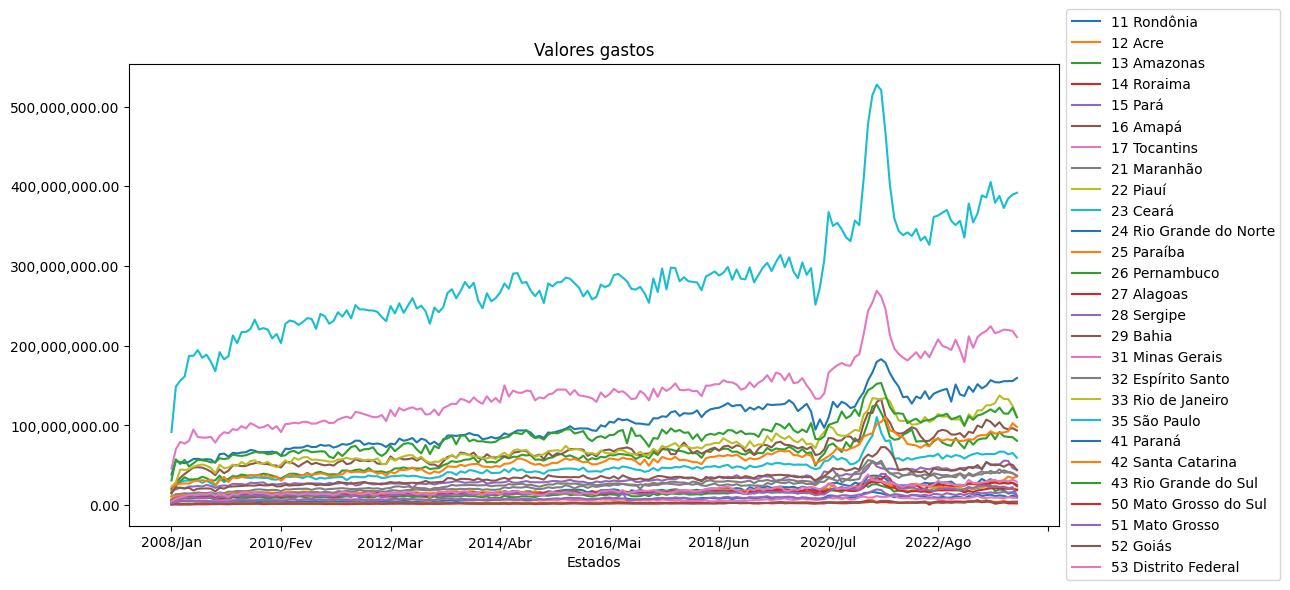

In [857]:
ax=dados_usaveis.T.plot(figsize=(12,6))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
# Mostrar o gráfico
plt.title('Valores gastos')
plt.xlabel('Estados')
plt.show()

In [858]:
import numpy as np

np.random.seed(524387)
dados_usaveis.sample(n=7)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,4658414.01,...,11471603.73,9213748.90,8917570.89,9627055.69,9418896.52,9147983.05,8620368.58,10074761.74,9153216.24,9283592.85
26 Pernambuco,14393949.89,24181400.95,29991302.71,34806197.97,32147987.35,32239094.89,32685640.76,35457038.66,33668261.46,30579747.51,...,81709323.83,83415737.37,83642878.93,91310048.72,82535461.39,91648480.56,86389288.58,85514155.44,85157013.35,80641692.00
31 Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,...,210658033.28,215485821.01,218556887.17,224399367.99,215467071.15,217575283.60,220089086.11,219630458.00,218399694.06,210600588.73
22 Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.40,10899198.97,11715943.38,...,22614251.89,22927380.71,23012661.22,22561338.38,24604607.40,22561682.28,23220140.98,21679394.17,20742978.54,20059583.85
25 Paraíba,10723002.45,11386274.47,12053643.87,12653528.76,12215107.11,12256928.49,12755413.77,12872578.37,12558296.11,12768727.85,...,25054233.04,23334471.42,30188993.41,28921152.61,28752456.30,30213039.18,31095681.86,35814732.06,33673474.35,35916074.75
29 Bahia,21211522.47,28189304.95,34181483.52,39026934.13,42949566.82,47025972.04,47481695.17,46931248.28,44883379.31,41920011.46,...,99751740.98,97348534.27,107185265.35,104400052.05,98646468.29,103997342.39,96896542.50,94934933.08,96511835.82,93539618.02
42 Santa Catarina,16504913.45,25651429.11,26743524.89,27181488.26,26845308.18,29909762.04,30789135.84,31250854.33,30019676.93,31957603.59,...,86601553.55,87833018.53,87535632.27,92610928.13,89581734.43,90773229.10,91080778.88,92547451.21,102620388.64,97937936.44


<Axes: >

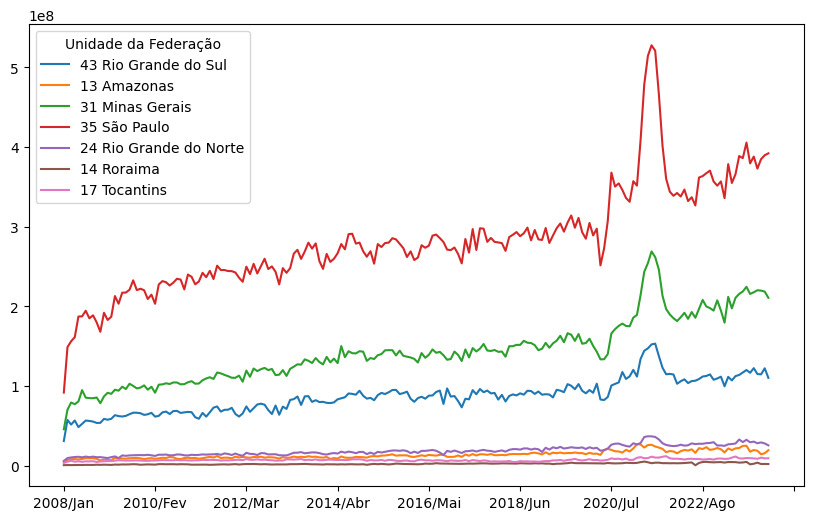

In [859]:
dados_dos_7_estados = dados_usaveis.sample(n=7)
dados_dos_7_estados.T.plot(figsize=(10,6))

In [860]:
dados_dos_7_estados["Total"] = dados_dos_7_estados.sum(axis = 1)
dados_dos_7_estados.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,...,113809028.30,116985178.63,120027121.08,116546657.80,122327620.35,114961095.80,114592706.42,122175213.25,110157952.68,16861947552.87
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,22198453.04,24809424.63,25005360.86,17522338.72,19666174.84,18699831.38,14319685.45,15620232.73,19370859.68,2633903286.60
31 Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,...,215485821.01,218556887.17,224399367.99,215467071.15,217575283.60,220089086.11,219630458.00,218399694.06,210600588.73,27796524022.60
35 São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,...,388449616.64,385876245.99,405373298.78,379263745.60,387813091.33,372701982.57,384608696.11,389453447.83,391865978.32,54836704151.38
24 Rio Grande do Norte,5947814.08,9509755.83,10352238.59,10855108.50,11160168.19,10475071.38,11386349.96,10640817.47,11336030.28,10606465.07,...,32825468.35,29580008.07,32464805.34,29353722.25,30169355.50,28135693.47,29195572.75,27877979.56,25523945.72,3668769439.80


In [861]:
dados_ordenados = dados_dos_7_estados.sort_values(by='Total', ascending=False)

# Agora, para mostrar os 7 primeiros registros após a ordenação
primeiros_7 = dados_ordenados.head(7)
primeiros_7.head(7)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,...,388449616.64,385876245.99,405373298.78,379263745.60,387813091.33,372701982.57,384608696.11,389453447.83,391865978.32,54836704151.38
31 Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,...,215485821.01,218556887.17,224399367.99,215467071.15,217575283.60,220089086.11,219630458.00,218399694.06,210600588.73,27796524022.60
43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,...,113809028.30,116985178.63,120027121.08,116546657.80,122327620.35,114961095.80,114592706.42,122175213.25,110157952.68,16861947552.87
24 Rio Grande do Norte,5947814.08,9509755.83,10352238.59,10855108.50,11160168.19,10475071.38,11386349.96,10640817.47,11336030.28,10606465.07,...,32825468.35,29580008.07,32464805.34,29353722.25,30169355.50,28135693.47,29195572.75,27877979.56,25523945.72,3668769439.80
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,22198453.04,24809424.63,25005360.86,17522338.72,19666174.84,18699831.38,14319685.45,15620232.73,19370859.68,2633903286.60
17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,4658414.01,...,9213748.90,8917570.89,9627055.69,9418896.52,9147983.05,8620368.58,10074761.74,9153216.24,9283592.85,1382210526.05
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,3795465.55,2077360.03,2164371.02,2040590.11,454137573.42


In [862]:
print(primeiros_7.index)


Index(['35 São Paulo', '31 Minas Gerais', '43 Rio Grande do Sul',
       '24 Rio Grande do Norte', '13 Amazonas', '17 Tocantins', '14 Roraima'],
      dtype='object', name='Unidade da Federação')


In [863]:
mapeamento_regioes = {
    '35 São Paulo': 'Sudeste',
    '31 Minas Gerais': 'Sudeste',
    '43 Rio Grande do Sul': 'Sul',
    '24 Rio Grande do Norte': 'Nordeste',
    '13 Amazonas': 'Norte',
    '17 Tocantins': 'Norte',
    '14 Roraima': 'Norte'
}

In [864]:
primeiros_7['Região'] = primeiros_7.index.map(mapeamento_regioes)


<ipython-input-864-aca0b7a2c15b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primeiros_7['Região'] = primeiros_7.index.map(mapeamento_regioes)


In [865]:
primeiros_7

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,...,385876245.99,405373298.78,379263745.60,387813091.33,372701982.57,384608696.11,389453447.83,391865978.32,54836704151.38,Sudeste
31 Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,...,218556887.17,224399367.99,215467071.15,217575283.60,220089086.11,219630458.00,218399694.06,210600588.73,27796524022.60,Sudeste
43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,...,116985178.63,120027121.08,116546657.80,122327620.35,114961095.80,114592706.42,122175213.25,110157952.68,16861947552.87,Sul
24 Rio Grande do Norte,5947814.08,9509755.83,10352238.59,10855108.50,11160168.19,10475071.38,11386349.96,10640817.47,11336030.28,10606465.07,...,29580008.07,32464805.34,29353722.25,30169355.50,28135693.47,29195572.75,27877979.56,25523945.72,3668769439.80,Nordeste
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,24809424.63,25005360.86,17522338.72,19666174.84,18699831.38,14319685.45,15620232.73,19370859.68,2633903286.60,Norte
17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,4658414.01,...,8917570.89,9627055.69,9418896.52,9147983.05,8620368.58,10074761.74,9153216.24,9283592.85,1382210526.05,Norte
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,4040988.99,4766375.31,1679849.33,2443674.72,3795465.55,2077360.03,2164371.02,2040590.11,454137573.42,Norte


In [866]:
dados_usaveis.loc['41 Paraná']

2008/Jan    38266347.46
2008/Fev    55384670.52
2008/Mar    53801318.85
2008/Abr    52460306.69
2008/Mai    54419620.71
               ...     
2023/Out   153869655.49
2023/Nov   155409140.80
2023/Dez   155539644.48
2024/Jan   155602556.18
2024/Fev   159448884.44
Name: 41 Paraná, Length: 194, dtype: float64

In [867]:
dados_usaveis.loc['41 Paraná', 'Região'] = 'Sul'

# Mostrando o DataFrame atualizado

In [868]:
dados_parana = dados_usaveis.loc['41 Paraná']
primeiros_7.loc['41 Paraná'] = dados_parana


<ipython-input-868-2f39004b7fd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primeiros_7.loc['41 Paraná'] = dados_parana


In [869]:
primeiros_7

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,...,385876245.99,405373298.78,379263745.60,387813091.33,372701982.57,384608696.11,389453447.83,391865978.32,54836704151.38,Sudeste
31 Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,...,218556887.17,224399367.99,215467071.15,217575283.60,220089086.11,219630458.00,218399694.06,210600588.73,27796524022.60,Sudeste
43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,...,116985178.63,120027121.08,116546657.80,122327620.35,114961095.80,114592706.42,122175213.25,110157952.68,16861947552.87,Sul
24 Rio Grande do Norte,5947814.08,9509755.83,10352238.59,10855108.50,11160168.19,10475071.38,11386349.96,10640817.47,11336030.28,10606465.07,...,29580008.07,32464805.34,29353722.25,30169355.50,28135693.47,29195572.75,27877979.56,25523945.72,3668769439.80,Nordeste
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,24809424.63,25005360.86,17522338.72,19666174.84,18699831.38,14319685.45,15620232.73,19370859.68,2633903286.60,Norte
17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,4658414.01,...,8917570.89,9627055.69,9418896.52,9147983.05,8620368.58,10074761.74,9153216.24,9283592.85,1382210526.05,Norte
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,4040988.99,4766375.31,1679849.33,2443674.72,3795465.55,2077360.03,2164371.02,2040590.11,454137573.42,Norte
41 Paraná,38266347.46,55384670.52,53801318.85,52460306.69,54419620.71,57811688.48,58094241.83,56982774.90,57549082.26,57121887.41,...,149769437.37,156758777.17,154108183.21,153869655.49,155409140.80,155539644.48,155602556.18,159448884.44,NaN,Sul


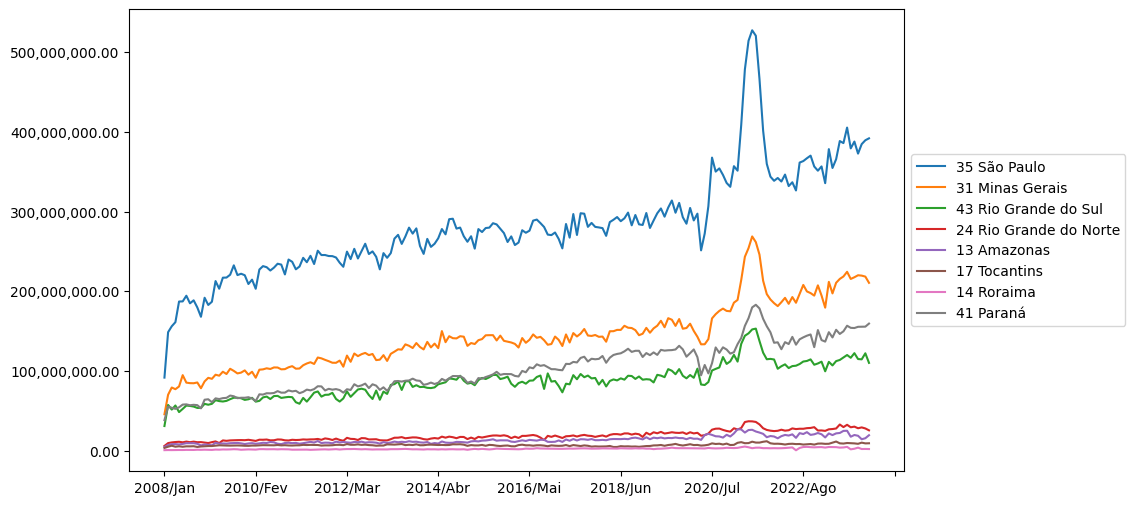

In [870]:
colunas_para_plot = primeiros_7.iloc[:, :-2]

# Plotando o gráfico

ax=colunas_para_plot.T.plot(figsize=(10, 6))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Mostrar o gráfico
plt.show()

In [871]:
dados_Sudeste= primeiros_7[primeiros_7['Região'] == 'Sudeste']
dados_Sudeste

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,...,385876245.99,405373298.78,379263745.60,387813091.33,372701982.57,384608696.11,389453447.83,391865978.32,54836704151.38,Sudeste
31 Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,...,218556887.17,224399367.99,215467071.15,217575283.60,220089086.11,219630458.00,218399694.06,210600588.73,27796524022.60,Sudeste


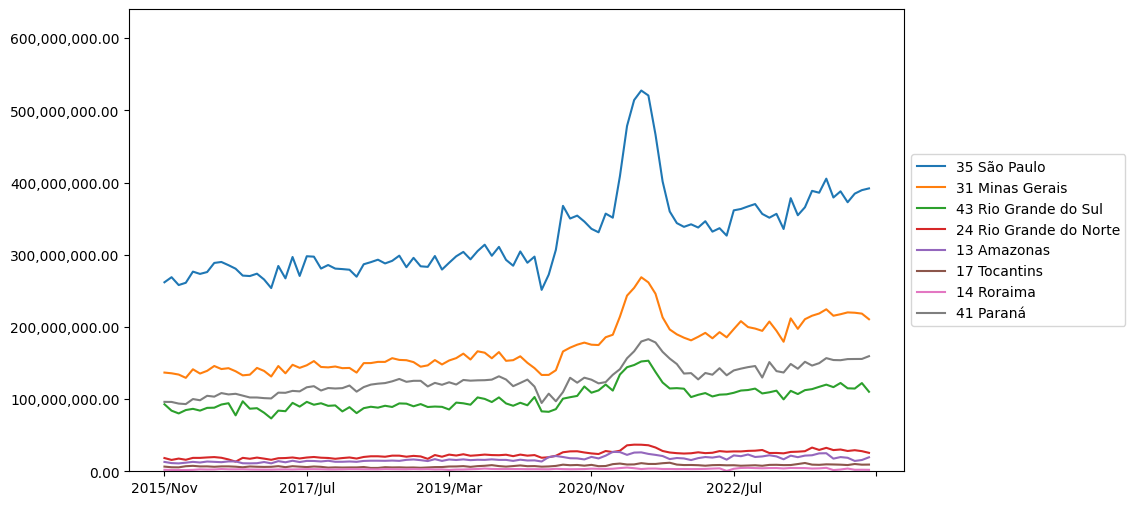

In [872]:
colunas_para_plot = primeiros_7.iloc[:, :-2]
colunas_para_plot_dengue=colunas_para_plot.iloc[:,-100:]
ax=colunas_para_plot_dengue.T.plot(figsize=(10, 6))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Mostrar o gráfico
plt.ylim(0,640000000)
plt.show()

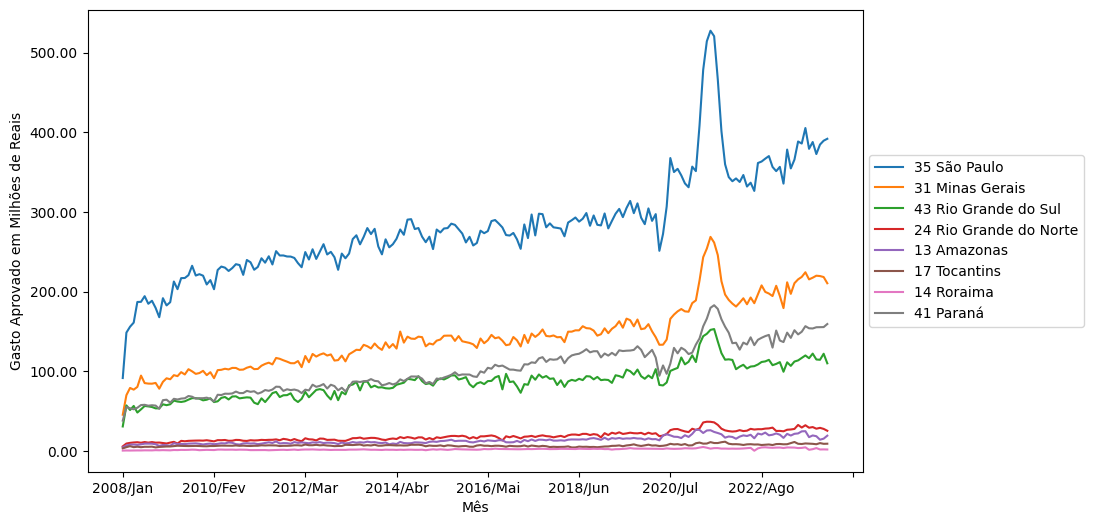

In [873]:
colunas_para_plot = primeiros_7.iloc[:, :-2]

# Plotando o gráfico
colunas_para_plot_tratado=colunas_para_plot/1_000_000
ax=colunas_para_plot_tratado.T.plot(figsize=(10, 6))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Gasto Aprovado em Milhões de Reais")
ax.set_xlabel("Mês")

# Mostrar o gráfico
plt.show()

<Axes: >

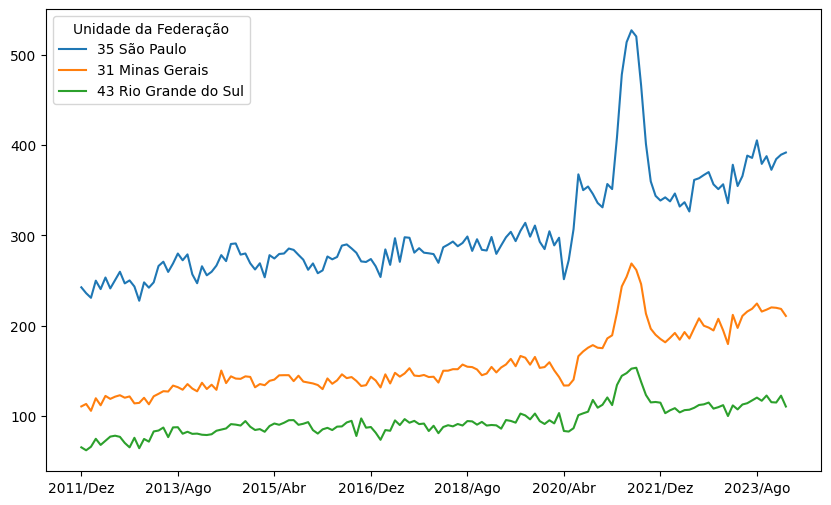

In [874]:
meses_filtrados=colunas_para_plot_tratado.columns[47:]
colunas_para_plot_tratado[meses_filtrados].head(3).T.plot(figsize=(10,6))

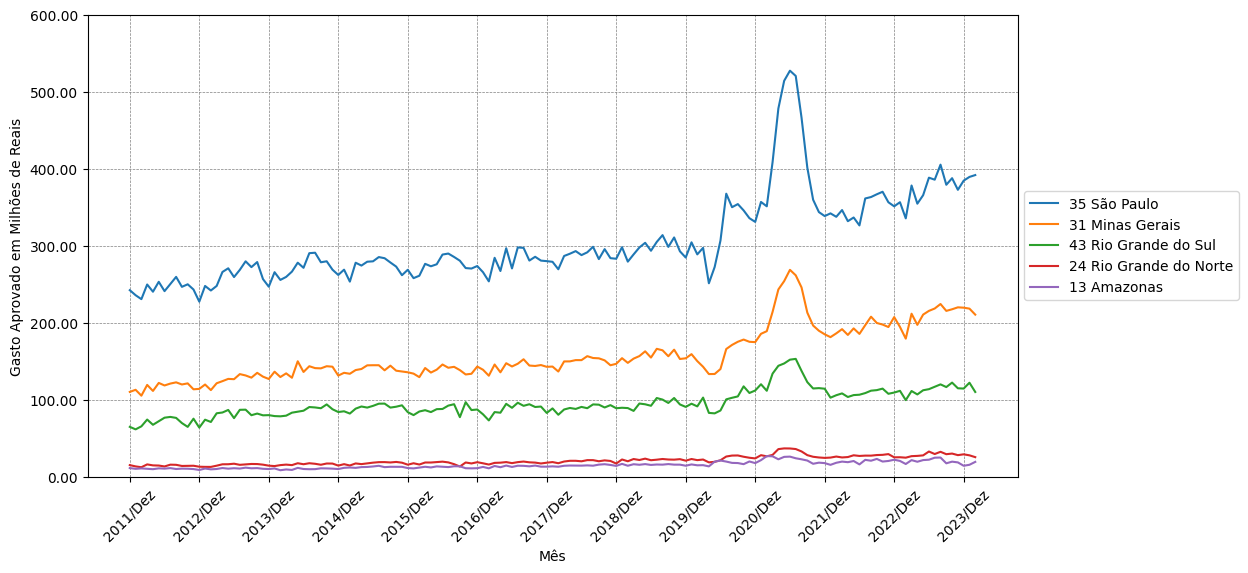

In [875]:
def plota_gastos_mes(informacao):
    ax=informacao.T.plot(figsize=(12, 6))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
    ax.set_ylabel("Gasto Aprovado em Milhões de Reais")
    ax.set_xlabel("Mês")
    ticks = range(0, len(informacao.columns), 12)
    ax.set_xticks(ticks)

    labels = [informacao.columns[i] for i in ticks]
    ax.set_xticklabels(labels, rotation=45)
    ax.grid(True, linestyle='--', which='both', color='grey', linewidth=0.5)

    plt.ylim(0,600)
plota_gastos_mes(colunas_para_plot_tratado[meses_filtrados].head(5))

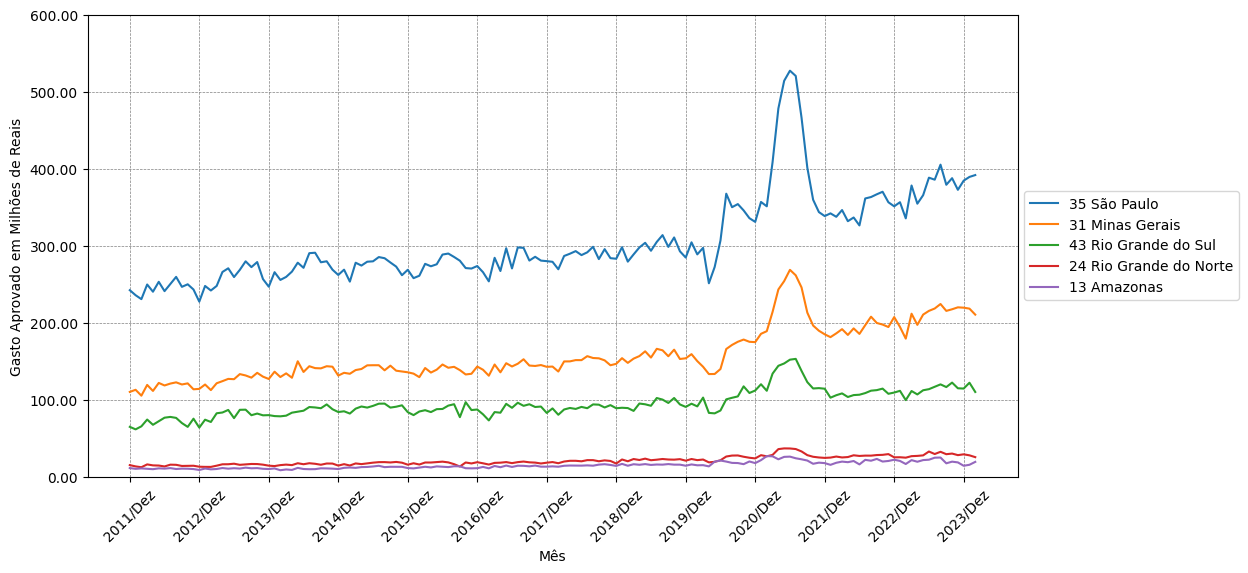

In [876]:
plota_gastos_mes(colunas_para_plot_tratado[meses_filtrados].head(5))

In [877]:
colunas_para_plot_tratado[meses_filtrados].head(5)
# Exibindo o gráfico


,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,242.36,235.84,230.72,249.73,240.38,253.24,241.13,250.43,259.63,246.70,...,365.74,388.45,385.88,405.37,379.26,387.81,372.70,384.61,389.45,391.87
31 Minas Gerais,110.25,113.00,105.37,119.32,111.51,121.92,118.62,121.07,122.66,119.91,...,210.66,215.49,218.56,224.40,215.47,217.58,220.09,219.63,218.40,210.60
43 Rio Grande do Sul,64.88,61.61,65.54,74.34,67.55,72.18,76.77,77.77,76.50,69.76,...,112.39,113.81,116.99,120.03,116.55,122.33,114.96,114.59,122.18,110.16
24 Rio Grande do Norte,15.17,13.51,12.43,16.11,14.82,14.62,13.43,15.76,15.57,14.08,...,27.82,32.83,29.58,32.46,29.35,30.17,28.14,29.20,27.88,25.52
13 Amazonas,11.31,10.35,10.90,10.34,9.89,10.96,10.61,11.28,10.12,10.61,...,21.71,22.20,24.81,25.01,17.52,19.67,18.70,14.32,15.62,19.37


In [878]:
#mostrando dados de taxa de mortalidade por estado x gasto

In [879]:
tabela_mort=pd.read_csv("/content/sih_cnv_qiuf162202177_83_61_250(1).csv",encoding="ISO-8859-1",
            skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")
tabela_mort.head()

<ipython-input-879-fa975db0407e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  tabela_mort=pd.read_csv("/content/sih_cnv_qiuf162202177_83_61_250(1).csv",encoding="ISO-8859-1",


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,Total
0,11 Rondônia,1.38,1.36,1.04,1.00,1.20,1.21,1.44,1.50,1.40,...,3.02,2.90,3.19,3.08,2.60,2.58,2.96,3.28,2.99,2.85
1,12 Acre,1.44,3.06,2.01,2.76,2.60,1.76,2.34,2.73,2.28,...,3.24,3.08,3.19,2.37,2.24,3.21,2.46,2.92,...,3.04
2,13 Amazonas,1.60,1.91,2.11,2.20,1.87,1.92,1.87,1.81,1.69,...,3.60,3.36,3.13,2.89,2.99,2.37,2.66,3.38,3.52,3.06
3,14 Roraima,1.56,1.16,1.27,1.93,1.28,1.18,1.65,1.35,1.78,...,1.99,2.31,3.09,6.84,4.79,3.52,3.14,2.77,2.85,2.83
4,15 Pará,1.41,1.40,1.53,1.27,1.39,1.45,1.64,1.51,1.73,...,2.76,2.65,2.78,2.61,2.49,2.70,2.54,2.85,3.13,2.32


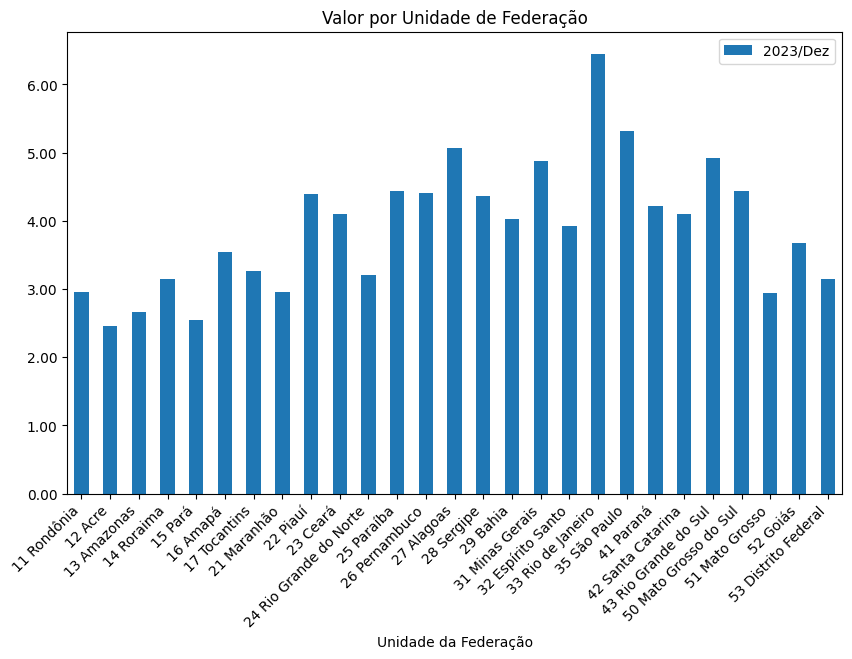

In [880]:
axis1=tabela_mort.plot(x="Unidade da Federação",y="2023/Dez", kind="bar",figsize=(10,6))
axis1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(rotation=45, ha='right')


plt.title("Valor por Unidade de Federação")
plt.show()


In [881]:

tabela_mort.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,Total
0,11 Rondônia,1.38,1.36,1.04,1.00,1.20,1.21,1.44,1.50,1.40,...,3.02,2.90,3.19,3.08,2.60,2.58,2.96,3.28,2.99,2.85
1,12 Acre,1.44,3.06,2.01,2.76,2.60,1.76,2.34,2.73,2.28,...,3.24,3.08,3.19,2.37,2.24,3.21,2.46,2.92,...,3.04
2,13 Amazonas,1.60,1.91,2.11,2.20,1.87,1.92,1.87,1.81,1.69,...,3.60,3.36,3.13,2.89,2.99,2.37,2.66,3.38,3.52,3.06
3,14 Roraima,1.56,1.16,1.27,1.93,1.28,1.18,1.65,1.35,1.78,...,1.99,2.31,3.09,6.84,4.79,3.52,3.14,2.77,2.85,2.83
4,15 Pará,1.41,1.40,1.53,1.27,1.39,1.45,1.64,1.51,1.73,...,2.76,2.65,2.78,2.61,2.49,2.70,2.54,2.85,3.13,2.32


In [882]:
tabela_mort.sample(n=7)

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,Total
2,13 Amazonas,1.60,1.91,2.11,2.20,1.87,1.92,1.87,1.81,1.69,...,3.60,3.36,3.13,2.89,2.99,2.37,2.66,3.38,3.52,3.06
13,27 Alagoas,1.57,1.83,1.89,1.92,1.85,2.05,1.97,2.00,2.20,...,4.61,5.28,5.02,4.60,4.65,4.96,5.07,4.81,4.99,3.83
9,23 Ceará,1.84,2.58,2.70,2.79,2.61,2.74,2.93,2.48,2.55,...,3.93,4.10,3.95,3.91,3.79,3.99,4.10,4.34,4.07,3.76
26,53 Distrito Federal,4.45,3.34,2.75,3.27,2.38,2.94,3.01,2.79,3.25,...,3.19,3.28,2.60,2.75,3.02,3.05,3.15,3.29,2.81,3.20
17,32 Espírito Santo,2.44,2.50,2.82,3.24,2.69,3.67,3.18,3.23,3.10,...,4.00,4.10,4.33,4.01,4.37,4.01,3.93,4.05,4.04,3.90
19,35 São Paulo,3.80,4.40,4.43,4.37,4.57,4.70,5.00,4.92,4.64,...,5.46,5.59,5.30,5.31,5.17,5.45,5.31,5.36,5.11,5.24
24,51 Mato Grosso,2.07,2.66,2.39,2.87,2.29,2.81,2.51,2.52,2.52,...,3.07,2.96,3.08,3.30,2.98,3.29,2.94,3.35,2.99,3.56


In [883]:
tabela_mort_7_estados = tabela_mort.sample(n=7)
tabela_mort_7_estados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,Total
15,29 Bahia,1.91,2.31,1.96,1.97,1.90,2.01,2.51,2.32,2.34,...,3.93,4.10,3.82,3.86,3.76,3.70,4.03,4.02,4.03,3.46
7,21 Maranhão,0.94,1.25,1.17,1.18,1.34,1.07,1.23,1.41,1.27,...,2.94,2.98,2.67,2.92,2.61,2.90,2.96,3.61,3.55,2.32
11,25 Paraíba,2.62,2.98,2.70,2.84,2.53,2.71,2.86,2.92,2.84,...,4.33,4.95,4.57,4.45,4.36,4.46,4.43,5.13,5.05,4.48
14,28 Sergipe,0.96,1.92,2.82,2.47,1.97,2.65,2.08,2.94,2.35,...,5.19,5.00,4.90,4.63,4.86,5.12,4.36,4.71,4.45,4.44
8,22 Piauí,1.41,1.77,1.83,1.46,1.90,1.86,1.83,1.54,1.83,...,3.38,3.92,3.73,3.77,3.65,3.58,4.40,4.35,3.71,2.89
18,33 Rio de Janeiro,3.25,3.83,4.32,4.32,4.94,4.49,4.60,4.73,4.90,...,6.67,6.64,6.25,6.86,6.43,6.85,6.45,6.46,6.95,6.62
9,23 Ceará,1.84,2.58,2.70,2.79,2.61,2.74,2.93,2.48,2.55,...,3.93,4.10,3.95,3.91,3.79,3.99,4.10,4.34,4.07,3.76


In [884]:
tabela_mort_7_estados = tabela_mort_7_estados.set_index("Unidade da Federação")
colunas_para_plot = tabela_mort_7_estados.index.tolist()
colunas_para_plot.insert(0, "Unidade da Federação")

In [885]:


colunas_para_plot=tabela_mort_7_estados.iloc[:,-56:]
colunas_para_plot.drop(columns=["Total"], inplace=True)
colunas_para_plot

,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
29 Bahia,3.98,3.80,3.61,3.97,3.84,4.01,3.84,4.11,4.85,5.36,...,3.69,3.93,4.10,3.82,3.86,3.76,3.70,4.03,4.02,4.03
21 Maranhão,2.50,2.26,2.34,2.22,2.28,2.48,2.50,2.75,3.18,6.20,...,3.07,2.94,2.98,2.67,2.92,2.61,2.90,2.96,3.61,3.55
25 Paraíba,5.14,4.95,4.73,4.91,5.23,5.03,5.13,4.99,5.89,7.18,...,4.88,4.33,4.95,4.57,4.45,4.36,4.46,4.43,5.13,5.05
28 Sergipe,5.13,6.11,5.60,4.36,5.01,5.22,4.91,5.03,5.50,6.39,...,4.55,5.19,5.00,4.90,4.63,4.86,5.12,4.36,4.71,4.45
22 Piauí,3.03,3.01,2.75,2.68,2.94,3.13,2.87,2.96,3.53,3.67,...,3.44,3.38,3.92,3.73,3.77,3.65,3.58,4.40,4.35,3.71
33 Rio de Janeiro,6.63,6.53,6.62,6.48,6.77,7.19,6.59,7.11,8.27,11.01,...,5.94,6.67,6.64,6.25,6.86,6.43,6.85,6.45,6.46,6.95
23 Ceará,3.87,3.65,3.75,3.80,3.97,4.03,3.87,3.97,4.61,7.22,...,4.36,3.93,4.10,3.95,3.91,3.79,3.99,4.10,4.34,4.07


In [886]:
colunas_para_plot.index
colunas_para_plot.reset_index(inplace=True)

In [887]:
dados_sao_paulo = colunas_para_plot[colunas_para_plot["Unidade da Federação"] == "35 São Paulo"]
dados_sao_paulo
# Plotando o gráfico de barras apenas para São Paulo


,Unidade da Federação,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev


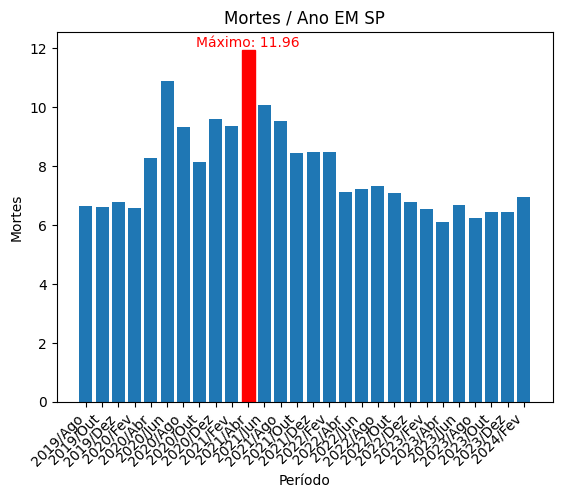

In [889]:
import matplotlib.pyplot as plt

# Supondo que 'colunas_para_plot' já tenha sido definido
linha_sao_paulo = colunas_para_plot[colunas_para_plot["Unidade da Federação"] == "33 Rio de Janeiro"].iloc[0]

# Extraindo as colunas de tempo e os valores correspondentes à linha "35 São Paulo"
colunas_tempo = colunas_para_plot.columns[1:]
valores_sao_paulo = linha_sao_paulo[colunas_tempo]

# Converter os valores para números
valores_sao_paulo = valores_sao_paulo.astype(float)

# Amostrando os rótulos de tempo e os valores para mostrar apenas 10 pontos
amostra_colunas_tempo = colunas_tempo[::int(len(colunas_tempo)/20)]
amostra_valores_sao_paulo = valores_sao_paulo[::int(len(valores_sao_paulo)/20)]
valor_maximo = max(amostra_valores_sao_paulo)

# Plotando a série com 10 pontos no eixo x
barras = plt.bar(amostra_colunas_tempo, amostra_valores_sao_paulo)

# Encontrando o índice do valor máximo
indice_maximo = valores_sao_paulo.idxmax()

# Destacando a barra máxima
barras[amostra_colunas_tempo.get_loc(indice_maximo)].set_color('red')

# Adicionando o valor máximo como texto no gráfico
plt.text(amostra_colunas_tempo.get_loc(indice_maximo), valor_maximo, f'Máximo: {valor_maximo}', ha='center', va='bottom', color='red')

# Personalizando o gráfico
plt.title("Mortes / Ano EM SP")
plt.xlabel("Período")
plt.ylabel("Mortes")
plt.xticks(rotation=45, ha='right')

# Exibindo o gráfico
plt.show()


In [891]:
ibge_estimativa=pd.read_excel('/content/POP2021_20230710.xls')
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2021,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,213317639
2,Região Norte,NaN,18906962
3,Rondônia,NaN,1815278
4,Acre,NaN,906876
